In [2]:
import pandas as pd
import matplotlib.pyplot as plt
 import seaborn as sns
 
df=pd.read_csv('imdb.csv')

In [4]:
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,\N,1,0,2089,1,10,2,...,"Documentary,Short",1,3,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",9,0,1,['silent'],0
1,Un bon bock,"(5, 6]",1892,\N,12,0,183,1,10,2,...,"Animation,Short",0,0,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",3,0,1,['silent'],0
2,Chinese Opium Den,"(4, 5]",1894,\N,1,0,195,1,10,1,...,Short,0,1,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",4,0,1,['silent'],0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,\N,1,1,2237,1,10,3,...,"Documentary,Short",1,6,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",6,0,1,['silent'],0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,\N,1,0,13115,1,10,12,...,"Documentary,Short",6,5,7.4,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",21,0,2,['silent'],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",1993,\N,96,0,11,1,10,0,...,Documentary,0,2,7.0,"['\\N', 'CO']",1,1,1,[],0
149527,Eco,"(6, 7]",2019,\N,14,0,15,1,10,4,...,"Drama,Short",6,3,6.4,"['\\N', 'ES']",5,1,1,[],0
149528,Women Take Center Stage,"(5, 6]",2019,\N,\N,0,12,1,10,2,...,Reality-TV,1,0,5.6,['\\N'],0,0,0,[],0
149529,Horrid Henry and the Christening Crisis,"(7, 8]",2011,\N,10,0,9,1,10,1,...,"Adventure,Animation,Comedy",7,0,7.1,['\\N'],0,3,1,[],0


In [6]:
# Kontrollo për NaN në të gjithë dataset-in
nan_values = df.isna().sum()

# Shfaq rezultatet për NaN
print(nan_values)


originalTitle                      0
rating                             0
startYear                          0
endYear                            0
runtimeMinutes                     0
awardWins                          0
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                39987
genres                             0
castNumber                         0
companiesNumber                    0
averageRating                      0
regions                            0
e

In [8]:
# Gjeni tipin e të dhënave për çdo kolonë
print(df.dtypes)


originalTitle                   object
rating                          object
startYear                        int64
endYear                         object
runtimeMinutes                  object
awardWins                        int64
numVotes                         int64
worstRating                      int64
bestRating                       int64
totalImages                      int64
totalVideos                      int64
totalCredits                     int64
criticReviewsTotal               int64
titleType                       object
awardNominationsExcludeWins      int64
canHaveEpisodes                   bool
isRatable                         bool
isAdult                          int64
numRegions                       int64
userReviewsTotal                 int64
ratingCount                      int64
countryOfOrigin                 object
genres                          object
castNumber                       int64
companiesNumber                  int64
averageRating            

In [10]:
# Shpërndaj genre-t e ndara me presje në elemente të veçanta
genres_exploded = df['genres'].str.split(',').explode()

# Shiko vlerat unike të genres
unique_genres = genres_exploded.unique()

# Shfaq vlerat unike
print(unique_genres)


['Documentary' 'Short' 'Animation' 'Comedy' 'Sport' 'Drama' 'Fantasy'
 'Horror' 'War' 'Action' 'Crime' 'History' 'News' 'Music' 'Adventure'
 'Western' 'Family' 'Mystery' 'Romance' 'Biography' '\\N' 'Thriller'
 'Sci-Fi' 'Musical' 'Film-Noir' 'Reality-TV' 'Game-Show' 'Talk-Show'
 'Adult']


In [14]:
 #Kontrollo për rreshta të plotë të dublikuar
duplicates = df.duplicated()

# Shfaq rreshtat e dublikuar
print(df[duplicates])


                                            originalTitle  rating  startYear  \
61836         Paradise Found: Creating the Director's Cut  (7, 8]       2006   
81847                Bryan Cranston/Julia Garner/Surfaces  (7, 8]       2020   
83077                             Masters of the Universe  (7, 8]       2020   
101058              The Making of Humanoids from the Deep  (7, 8]       2010   
138209                      Adam Levine/Josh Gad/Maroon 5  (6, 7]       2017   
138320         Morgan Freeman/Norman Reedus/Joe Zimmerman  (6, 7]       2017   
140635  Kenan Thompson/Leah Remini/Bryan Fogel/Roy May...  (6, 7]       2017   
141603         Jeff Bridges/David Boreanaz/Liam Gallagher  (6, 7]       2017   
142611          Nick Jonas/Dennis Rodman/Jeezy/Tory Lanez  (6, 7]       2017   
143497                        Maze Runner: The Death Cure  (7, 8]       2018   

       endYear runtimeMinutes  awardWins  numVotes  worstRating  bestRating  \
61836       \N              9          0

In [16]:
# Fshi rreshtat e dublikuar
df_no_duplicates = df.drop_duplicates()

# Shfaq DataFrame-n pa dublikate
print(df_no_duplicates)


                                  originalTitle  rating  startYear endYear  \
0                                    Carmencita  (5, 6]       1894      \N   
1                                   Un bon bock  (5, 6]       1892      \N   
2                             Chinese Opium Den  (4, 5]       1894      \N   
3        Edison Kinetoscopic Record of a Sneeze  (5, 6]       1894      \N   
4              L'arrivée d'un train à La Ciotat  (7, 8]       1896      \N   
...                                         ...     ...        ...     ...   
149526                         Nuestra película  (6, 7]       1993      \N   
149527                                      Eco  (6, 7]       2019      \N   
149528                  Women Take Center Stage  (5, 6]       2019      \N   
149529  Horrid Henry and the Christening Crisis  (7, 8]       2011      \N   
149530             A lenda do soprador de vidro  (8, 9]       2019      \N   

       runtimeMinutes  awardWins  numVotes  worstRating  bestRa

### Start Year , 

In [21]:
# Shiko vlerat unike të kolones 'startYear'
unique_start_years = df['startYear'].unique()

# Shfaq vlerat unike
print(unique_start_years)


[1894 1892 1896 1895 1898 1897 1900 1899 1901 1902 1903 1905 1907 1906
 1908 1909 1911 1910 1912 1913 1914 1915 1916 1917 1922 1918 1919 1921
 1920 1923 1924 1925 1926 1927 1928 1929 1930 1931 1950 1938 1932 1934
 1933 1946 1935 1936 1939 1937 1941 1940 1942 1943 1948 1944 1945 1953
 1947 1949 1951 1952 1958 1956 1955 1954 1977 1957 1960 1959 1961 1962
 1963 1964 1965 1966 1967 1969 1968 1972 1973 1971 1970 1974 1975 2010
 2018 2023 1976 2022 1979 1978 1982 1980 1983 1987 1984 1981 1986 1992
 1989 1985 1988 1991 1993 1990 1996 1995 1994 1999 1997 1998 2017 2005
 2001 2002 1904 2003 2009 2004 2012 2006 2019 2011 2007 1891 2013 2015
 2008 1890 2020 2016 2014 2021 2024 1878 1893 1881 1887]


#### quotesTotal

In [24]:
# Shiko vlerat unike të kolones 'quotesTotal'
unique_quotes_total = df['quotesTotal'].unique()

# Shfaq vlerat unike
print(unique_quotes_total)


[   0    1    5    2    6    9   17    3   20    8    7   11   15   10
   13    4   19   24   12   16   18   26   21   33   14   35   41   22
   47   88   55   32   28   36   31   44   38   42   39   43   25   27
   23   62   34   52   48   61   56   46   29   30   49   37   40   93
   57   51   79   58   59   69   95   80   91   66   90   53   89   50
   78   65   82   77  135   64   45   73   54   63   76   71   60   87
   68   74   92  124  108  161   83   81   67  131   70  111  126   96
  106   86  112   75  110  109  123   98  137  103  136  107  116  138
  162  664   72   99 1084  105   85  258  145  128   94   97  122  214
  358  156  943  654  270  114  133  192  147  100  203]


In [26]:
print(df.shape)

(149531, 32)


### worstRating

In [29]:
df["worstRating"].value_counts()

worstRating
1    149531
Name: count, dtype: int64

### bestRating

In [32]:
df["bestRating"].value_counts()

bestRating
10    149531
Name: count, dtype: int64

In [34]:
## siccome worst rating e best rating ha solo un valore, togliamo dal nostro studio

In [36]:
df.drop(columns=["worstRating", "bestRating"], inplace=True)

### End Year

In [39]:
df["endYear"].value_counts(dropna=False).head()

endYear
\N      143897
2022       241
2017       222
2019       211
2018       206
Name: count, dtype: int64

In [41]:
##krijojme nje atribut te ri duke pasur parasysh duration year ne vend qe te heqim fare 
# \N dmth en yar- start year 
# e per quelli end yar che non esistono mettiamo start la media , dmth start year - media 

In [43]:
import numpy as np
# 1. Zëvendësojmë '\N' me NaN në 'endYear'
df["endYear"] = df["endYear"].replace("\\N", np.nan)


# 2. Konvertojmë 'endYear' në numerik (nga string), për të lejuar llogaritjet
df["endYear"] = pd.to_numeric(df["endYear"], errors="coerce")

# 3. Krijojmë kolonën e diferencës: sa vite zgjat (vetëm ku ka vlera të dyja)
df["durationYears"] = df["endYear"] - df["startYear"]

# 4. Llogarisim mesataren e diferencës së viteve
mean_duration = df["durationYears"].mean()

# 5. Plotësojmë vlerat mungesë të 'endYear' me (startYear + mesatarja)
mask_missing_end = df["endYear"].isna()
df.loc[mask_missing_end, "endYear"] = df.loc[mask_missing_end, "startYear"] + round(mean_duration)

# 6. Rillogarisim 'durationYears' me 'endYear' të përditësuar
df["durationYears"] = df["endYear"] - df["startYear"]

# 7. Heqim 'startYear' dhe 'endYear' nga dataseti për të reduktuar atributet
df.drop(columns=[ "endYear"], inplace=True)

In [45]:
print(df["durationYears"].value_counts())

durationYears
2.0     144412
0.0       2480
1.0       1240
3.0        345
4.0        215
5.0        155
6.0        111
7.0         95
8.0         74
9.0         55
10.0        47
11.0        38
12.0        37
13.0        27
15.0        24
14.0        22
16.0        17
17.0        12
18.0        12
19.0        11
24.0         9
21.0         8
25.0         7
20.0         7
35.0         6
26.0         5
27.0         5
23.0         4
34.0         4
22.0         4
29.0         4
30.0         3
48.0         3
32.0         3
31.0         3
41.0         3
28.0         3
36.0         2
43.0         2
57.0         2
45.0         2
38.0         1
46.0         1
39.0         1
40.0         1
70.0         1
42.0         1
63.0         1
61.0         1
37.0         1
33.0         1
59.0         1
47.0         1
56.0         1
Name: count, dtype: int64


### soundMixes

In [48]:
print(df["soundMixes"].value_counts())

soundMixes
[]                                                                 96798
['mono']                                                           22813
['stereo']                                                         16725
['dolby_digital']                                                   4142
['silent']                                                          3293
                                                                   ...  
['dts', 'dolby', 'sdds', 'dolby_digital']                              1
['dolby', 'dts', 'sdds']                                               1
['animatophone', 'silent']                                             1
['dts', 'dolby_surround 7.1', 'dolby_digital', 'mono', 'dolby']        1
['dolby_digital', 'imax_6_track', 'dts', 'dolby_atmos']                1
Name: count, Length: 305, dtype: int64


In [133]:
import numpy as np

# 1. Normalizojmë 'soundMixes': marrim vetëm elementin e parë nga lista si string
df["soundMixes"] = df["soundMixes"].astype(str).str.strip("[]'").str.split(',').str[0]

# 2. Zëvendësojmë vlerat bosh "" ose "nan" me NaN për trajtim të mëtejshëm
df["soundMixes"] = df["soundMixes"].replace(["", "nan", "NaN"], np.nan)

# 3. Kolonat që do përdorim për grupim logjik (sipas kontekstit të filmave)
group_cols = ["titleType", "genres", "startYear"]

# 4. Marrim modën e 'soundMixes' për çdo grup (nëse ka)
mode_per_group = (
    df.groupby(group_cols)["soundMixes"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .reset_index()
    .rename(columns={"soundMixes": "most_common_mix"})
)

# 5. Bashkojmë modën me datasetin kryesor
df = df.merge(mode_per_group, on=group_cols, how="left")

# 6. Mbushim NaN-të në 'soundMixes' me modën e grupit
df["soundMixes"] = df["soundMixes"].fillna(df["most_common_mix"])

# 7. Heqim kolonën ndihmëse
df.drop(columns=["most_common_mix"], inplace=True)


In [141]:
# Gjejmë modën më të shpeshtë në të gjithë kolonën
global_mode = df["soundMixes"].mode().iloc[0]

# Plotësojmë NaN-të e mbetura
df["soundMixes"] = df["soundMixes"].fillna(global_mode)


In [137]:
df["soundMixes"].unique()


array(['silent', "animatophone'", nan, 'de_forest phonofilm', 'vitaphone',
       'mono', "mono'", "silent'", 'cinephone', 'b.a.f._sound system',
       "wicmar_and blue seal noiseless recording'", 'optiphone',
       "blue_seal noiseless recording'", '4_track_stereo',
       'magnaphone_western electric', 'dolby_digital', 'stereo',
       'perspecta_stereo', "perspecta_stereo'", 'cinerama_7_track',
       '70_mm 6_track', "70_mm 6_track'", 'dolby', 'dolby_atmos',
       "stereo'", 'dolby_stereo', "dolby_stereo'", "dolby'",
       'ultra_stereo', '6_track_stereo', "6_track_stereo'",
       "dolby_atmos'", "ultra_stereo'", 'matrix_surround', 'dolby_sr',
       "dolby_sr'", "imax_6_track'", 'sensurround', 'sonix',
       'sound_trax surround stereo', "dts'", 'dts', "dolby_digital'",
       'servotron_stereo', "sdds'", 'd_cinema_48khz 5.1', 'imax_6_track',
       "dts_stereo'", 'dx_stereo', 'sdds', 'dts_stereo',
       "dolby_digital ex'", "iwerks_digital audio'",
       'digitrac_digital

In [127]:
print(df["soundMixes"].value_counts())

soundMixes
['stereo']                                                                              61992
['mono']                                                                                45176
['dolby_digital']                                                                       17846
['dolby']                                                                                5507
['silent']                                                                               3673
                                                                                        ...  
['dts_es', '12_track_digital sound', 'auro_11.1', 'cinerama_7_track', 'dolby_atmos']        1
['dolby_digital', 'dts', 'sdds', 'dolby_atmos']                                             1
['stereo', 'ultra_stereo']                                                                  1
['dts', 'stereo']                                                                           1
['dolby_digital', 'imax_6_track', 'dts', 'dolby_a

### runtimeMinutes

In [55]:
# Numërojmë sa herë shfaqet '\N'
runtime_null_like = (df["runtimeMinutes"] == "\\N").sum()
print(f"Numri i vlerave '\\N' në 'runtimeMinutes': {runtime_null_like}")


Numri i vlerave '\N' në 'runtimeMinutes': 40195


In [57]:
# Sigurohemi që runtimeMinutes është numerik
df["runtimeMinutes"] = pd.to_numeric(df["runtimeMinutes"], errors="coerce")

# Lista e të gjitha kolonave numerike, përfshirë runtimeMinutes
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Korrelacioni i runtimeMinutes me të gjitha kolonat numerike
runtime_corr = df[numeric_cols].corr()["runtimeMinutes"].drop("runtimeMinutes").sort_values(ascending=False)
runtime_corr.head(10)



numRegions            0.272550
criticReviewsTotal    0.150129
externalLinks         0.143805
isAdult               0.101524
userReviewsTotal      0.082351
companiesNumber       0.079583
castNumber            0.063655
awardWins             0.063172
numVotes              0.063016
ratingCount           0.063016
Name: runtimeMinutes, dtype: float64

In [95]:
df['runtimeMinutes'] = df['runtimeMinutes'].astype(int)
 

In [59]:
df["runtimeMinutes"] = df.groupby("titleType")["runtimeMinutes"].transform(
    lambda x: x.fillna(x.median())
)

In [61]:
df.shape

(149531, 30)

### regions

In [64]:
# 1. Hiq çdo '\N' në mënyrë më të fortë dhe të përgjithshme
df["regions"] = df["regions"].astype(str).str.replace(r"'\\N'\s*,?\s*", "", regex=True)

# 2. Nëse mbetet bosh, vendos ['Unknown']
df["regions"] = df["regions"].replace(r"\[\s*\]", "['Unknown']", regex=True)


In [66]:

def clean_regions(val):
    try:
        region_list = ast.literal_eval(val)
        region_list = [r for r in region_list if r != '\\N']
        return str(region_list if region_list else ['Unknown'])
    except:
        return "['Unknown']"

# Apliko funksionin për çdo vlerë në kolonën 'regions'
df["regions"] = df["regions"].astype(str).apply(clean_regions)


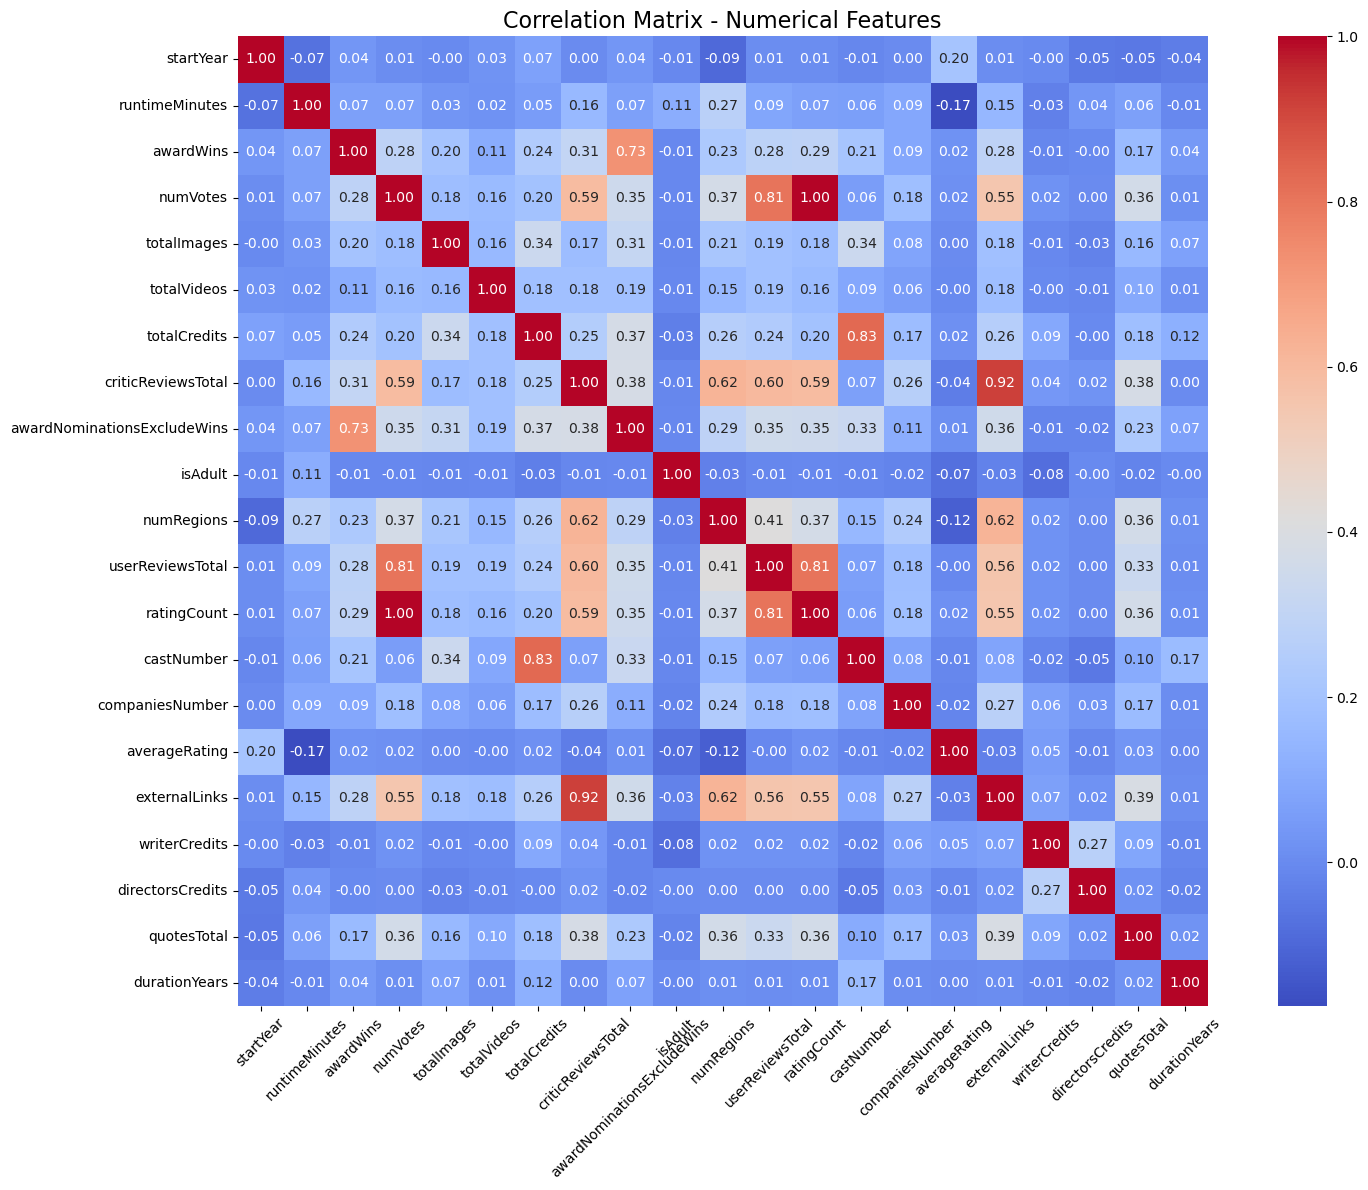

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Zgjedhim vetëm kolonat numerike
numeric_df = df.select_dtypes(include=["int64", "float64"])

# 2. Llogarisim matricën e korrelacionit
correlation_matrix = numeric_df.corr()

# 3. Vizualizojmë si heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix - Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [70]:
## heqja e kolonave qe kane coef correlazioni te larte

In [72]:
df.drop(columns=["numVotes", "castNumber", "externalLinks", "userReviewsTotal"], inplace=True)


In [76]:
df.drop(columns=["regions",], inplace=True)

## rating

In [85]:
# Marrim fundin e intervalit nga stringu
df['rating'] = df['rating'].str.extract(r',\s*(\d+)\]')[0].astype(int)


In [103]:
df

,originalTitle,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,...,ratingCount,countryOfOrigin,genres,companiesNumber,averageRating,writerCredits,directorsCredits,soundMixes,quotesTotal,durationYears
0,Carmencita,6,1894,1,0,2,0,4,3,short,...,2092,['US'],"Documentary,Short",3,5.7,0,1,['silent'],0,2.0
1,Un bon bock,6,1892,12,0,2,0,2,0,short,...,183,['FR'],"Animation,Short",0,5.4,0,1,['silent'],0,2.0
2,Chinese Opium Den,5,1894,1,0,1,0,1,0,short,...,195,['US'],Short,1,5.0,0,1,['silent'],0,2.0
3,Edison Kinetoscopic Record of a Sneeze,6,1894,1,1,3,0,4,2,short,...,2238,['US'],"Documentary,Short",6,5.4,0,1,['silent'],0,2.0
4,L'arrivée d'un train à La Ciotat,8,1896,1,0,12,0,11,16,short,...,13115,['FR'],"Documentary,Short",5,7.4,0,2,['silent'],0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,7,1993,96,0,0,0,11,0,movie,...,11,['CO'],Documentary,2,7.0,1,1,['mono'],0,2.0
149527,Eco,7,2019,14,0,4,1,52,1,short,...,15,['ES'],"Drama,Short",3,6.4,1,1,['stereo'],0,2.0
149528,Women Take Center Stage,6,2019,30,0,2,3,32,0,tvEpisode,...,12,NaN,Reality-TV,0,5.6,0,0,['dolby_digital'],0,2.0
149529,Horrid Henry and the Christening Crisis,8,2011,10,0,1,0,15,0,tvEpisode,...,10,NaN,"Adventure,Animation,Comedy",0,7.1,3,1,['stereo'],0,2.0


## genre 

In [105]:
df['genres'] = df['genres'].str.split(',').str[0]


In [113]:
df

,originalTitle,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,...,ratingCount,countryOfOrigin,genres,companiesNumber,averageRating,writerCredits,directorsCredits,soundMixes,quotesTotal,durationYears
0,Carmencita,6,1894,1,0,2,0,4,3,short,...,2092,['US'],Documentary,3,5.7,0,1,['silent'],0,2.0
1,Un bon bock,6,1892,12,0,2,0,2,0,short,...,183,['FR'],Animation,0,5.4,0,1,['silent'],0,2.0
2,Chinese Opium Den,5,1894,1,0,1,0,1,0,short,...,195,['US'],Short,1,5.0,0,1,['silent'],0,2.0
3,Edison Kinetoscopic Record of a Sneeze,6,1894,1,1,3,0,4,2,short,...,2238,['US'],Documentary,6,5.4,0,1,['silent'],0,2.0
4,L'arrivée d'un train à La Ciotat,8,1896,1,0,12,0,11,16,short,...,13115,['FR'],Documentary,5,7.4,0,2,['silent'],0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,7,1993,96,0,0,0,11,0,movie,...,11,['CO'],Documentary,2,7.0,1,1,['mono'],0,2.0
149527,Eco,7,2019,14,0,4,1,52,1,short,...,15,['ES'],Drama,3,6.4,1,1,['stereo'],0,2.0
149528,Women Take Center Stage,6,2019,30,0,2,3,32,0,tvEpisode,...,12,unknown,Reality-TV,0,5.6,0,0,['dolby_digital'],0,2.0
149529,Horrid Henry and the Christening Crisis,8,2011,10,0,1,0,15,0,tvEpisode,...,10,unknown,Adventure,0,7.1,3,1,['stereo'],0,2.0


### countryOfOrigin

In [116]:
df['countryOfOrigin'] = df['countryOfOrigin'].fillna('unknown')


In [118]:
df

,originalTitle,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,...,ratingCount,countryOfOrigin,genres,companiesNumber,averageRating,writerCredits,directorsCredits,soundMixes,quotesTotal,durationYears
0,Carmencita,6,1894,1,0,2,0,4,3,short,...,2092,['US'],Documentary,3,5.7,0,1,['silent'],0,2.0
1,Un bon bock,6,1892,12,0,2,0,2,0,short,...,183,['FR'],Animation,0,5.4,0,1,['silent'],0,2.0
2,Chinese Opium Den,5,1894,1,0,1,0,1,0,short,...,195,['US'],Short,1,5.0,0,1,['silent'],0,2.0
3,Edison Kinetoscopic Record of a Sneeze,6,1894,1,1,3,0,4,2,short,...,2238,['US'],Documentary,6,5.4,0,1,['silent'],0,2.0
4,L'arrivée d'un train à La Ciotat,8,1896,1,0,12,0,11,16,short,...,13115,['FR'],Documentary,5,7.4,0,2,['silent'],0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,7,1993,96,0,0,0,11,0,movie,...,11,['CO'],Documentary,2,7.0,1,1,['mono'],0,2.0
149527,Eco,7,2019,14,0,4,1,52,1,short,...,15,['ES'],Drama,3,6.4,1,1,['stereo'],0,2.0
149528,Women Take Center Stage,6,2019,30,0,2,3,32,0,tvEpisode,...,12,unknown,Reality-TV,0,5.6,0,0,['dolby_digital'],0,2.0
149529,Horrid Henry and the Christening Crisis,8,2011,10,0,1,0,15,0,tvEpisode,...,10,unknown,Adventure,0,7.1,3,1,['stereo'],0,2.0


### save df

In [145]:
df.to_csv('imdb_cleaned_finale.csv', index=False)


In [143]:
# Kontrollo për NaN në të gjithë dataset-in
nan_values = df.isna().sum()

# Shfaq rezultatet për NaN
print(nan_values)


originalTitle                  0
rating                         0
startYear                      0
runtimeMinutes                 0
awardWins                      0
totalImages                    0
totalVideos                    0
totalCredits                   0
criticReviewsTotal             0
titleType                      0
awardNominationsExcludeWins    0
canHaveEpisodes                0
isRatable                      0
isAdult                        0
numRegions                     0
ratingCount                    0
countryOfOrigin                0
genres                         0
companiesNumber                0
averageRating                  0
writerCredits                  0
directorsCredits               0
soundMixes                     0
quotesTotal                    0
durationYears                  0
dtype: int64
